# Rekurzivne funkcije

Tole niso ravno zapiski predavanj. V njih ni ničesar o tem, kaj je pravzaprav *rekurzivna funkcija*. Se pravi, ničesar o tem, da lahko funkcije kličejo same sebe. Tu je povzetek, tistega, kar se dogaja in kar programiramo na predavanjih. Za potrebe ponavljanja in učenja bi moralo zadoščati.

## Kaj se dogaja med predavanji

V letih, ko ravno ni nobene epidemije, na teh predavanjih navadno igramo s študenti takole igro.

Določeno število študentov dobi listke s svojim imenom, svojo starostjo in imeni svojih otrok. Jaz jim potem zastavljam različna vprašanja, oni pa se lahko sprašujejo med sabo. Po Zoomu to najbrž gre, vendar ... bomo videli.

Dogovorimo se za nekaj pravil:

- Ko vas nekdo nekaj vpraša, mu odgovorite – njemu. Dokler mu ne odgovorite,
  stojite (na Zoomu ... pač ne).

- Po potrebi lahko za to, da boste "sestavili odgovor" kaj vprašate druge –
  navadno svoje otroke. Pri tem vedno sprašujete samo enega naenkrat, tako da
  poveste njegovo ime in vprašanje. Vprašanje lahko izpustimo, če gre za
  enako vprašanje, kot ste ga pravkar zastavili komu drugemu ali pa ga je
  kdo pravkar zastavil vam.

- Da bodo stvari lepše tekle, se dogovorimo še, da morate spraševati svoje
  otroke v takšnem vrstnem redu, kot so napisani na listu.
  
- Vsak sliši samo odgovore, ki so namenjeni njemu. Predstavljajte si, da si
  pošiljamo listke.
  
- Ko odgovorite temu, ki vas je nekaj vprašal, pozabite odgovor. (Vendar
  šele takrat: dokler zbirate informacije, potrebne za odgovor, le-teh
  seveda ne pozabite.) Če vas kasneje vpraša kaj podobnega (ali celo isto),
  morate odgovor pridobivati ponovno. Vse vaše trajno "znanje" je to, kar piše na
  listku – vaše ime in imena vaših otrok.
  

## Novakovi

Najstarejši član rodbine Novakovih, Adam, 111 let, ima štiri otroke: Matjaža, Cilko, Danieka in Erika. Matjaž ima enega, namreč Viljema. Danijel ima Elizabeto in Hansa (kasneje se je Daniel namreč preselil v predmestje Graza, kjer ima manjše podjetje, in se poročil z Avstrijko), Cilka in Erik pa nimata otrok. In tako naprej. Vse skupaj je nabrano v spodnjem slovarju.

In [1]:
otroci = {
    "Adam": ["Matjaž", "Cilka", "Daniel"],
    "Aleksander": [],
    "Alenka": [],
    "Barbara": [],
    "Cilka": [],
    "Daniel": ["Elizabeta", "Hans"],
    "Erik": [],
    "Elizabeta": ["Ludvik", "Jurij", "Barbara"],
    "Franc": [],
    "Herman": ["Margareta"],
    "Hans": ["Herman", "Erik"],
    "Jožef": ["Alenka", "Aleksander", "Petra"],
    "Jurij": ["Franc", "Jožef"],
    "Ludvik": [],
    "Margareta": [],
    "Matjaž": ["Viljem"],
    "Petra": [],
    "Tadeja": [],
    "Viljem": ["Tadeja"],
}

Znane so tudi starosti vseh teh ljudi. V teh zapiskih jih sicer ne bomo potrebovali, uporabne pa so za kakšne druge naloge.

In [2]:
starost = {
    "Adam": 111, "Matjaž": 90, "Cilka": 88, "Daniel": 85, "Erik": 83,
    "Viljem": 58, "Tadeja": 20, "Elizabeta": 68, "Hans": 64, "Ludvik": 50,
    "Jurij": 49, "Barbara": 45, "Herman": 39, "Mihael": 32, "Franc": 30,
    "Jožef": 29, "Margareta": 3, "Alenka": 9, "Aleksander": 5, "Petra": 7}

Celoten rodovnik je takšen (vendar tega študenti, vsaj v začetku igre, ne vidijo!).

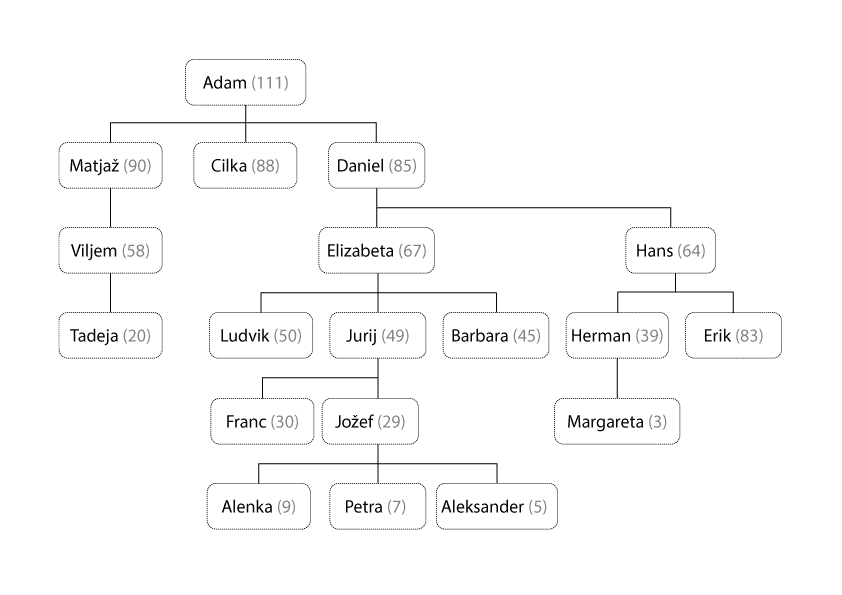

Napišimo, takole, za preprosto vajo, funkcijo, ki ji podamo osebo in pove,
koliko otrok ima.

In [3]:
def stevilo_otrok(oseba):
    return len(otroci[oseba])
    
stevilo_otrok("Jožef")

Kako pa bi izvemo število vnukov posamezne osebe? Tako da gremo prek vseh otrok in seštevamo število njihovih otrok, recimo z

In [4]:
def stevilo_vnukov(oseba):
    v = 0
    for otrok in otroci[oseba]:
        v += len(otroci[otrok])
    return v

stevilo_vnukov("Daniel")

ali, brez velike razlike,

In [5]:
def stevilo_vnukov(oseba):
    v = 0
    for otrok in otroci[oseba]:
        v += stevilo_otrok(otrok)
    return v

stevilo_vnukov("Daniel")

Uh, kaj kompliciramo, saj že od predprejšnjega tedna znamo

In [6]:
def stevilo_vnukov(oseba):
    return sum(stevilo_otrok(otrok) for otrok in otroci[oseba])

## Velikost rodbine

Do sem - nič posebnega. Zdaj pa pridejo zanimive reči: za nekoga nas zanima, velika je njegova rodbina, skupaj z njim, njegovimi otroki, vnuki, pravnuki in tako naprej. Recimo, da ima rojstni dan in bo povabil vso svojo rodbino na večerjo. Koliko krožnikov za juho potrebuje.

(Na predavanjih navadno vprašam nekoga, recimo Adama, po velikosti njegove rodbine.)

Kaj mu je storiti? Vse svoje otroke, bo vprašal, kako velike so njihove rodbine. To bo seštel in prištel še sebe. Kako bodo ti otroci izvedeli velikosti svojih rodbin? Tako, da bodo vprašali vse svoje otroke po velikosti njihovih rodbin, to sešteli in prišteli še sebe. Pa njihovi otroci? Enako.

Spremenimo to v funkcijo. Velikost rodbine dobimo tako, da gremo prek otrok in seštevamo velikosti njihovih rodbin.

In [7]:
def velikost_rodbine(oseba):
    v = 0
    for otrok in otroci[oseba]:
        v += velikost_rodbine(otrok)
    return v + 1

velikost_rodbine("Elizabeta")

Za tiste, ki znajo snov izpred dveh tednov:

In [8]:
def velikost_rodbine(oseba):
    return sum(velikost_rodbine(otrok) for otrok in otroci[oseba]) + 1

velikost_rodbine("Elizabeta")

Tule je primeren trenutek, da povemo nekaj pomembnega - kar je pravzaprav očitno, ampak vam malo kasneje morda ne bo: **vsaka funkcija ima svoje lokalne spremenljivke**. To vemo že nekaj časa. A tudi, ko funkcija kliče samo sebe, **ima vsaka "inkarnacija" funkcije svoje spremenljivke**. Funkcija `velikost_rodbine` si pripravi `v = 0`. Nato ga povečuje. A ko kliče samo sebe, in si v (rekurzivnih) klicih funkcija pripravi `v = 0`, je to **drug in ne isti `v`**.

## Poišči osebo

Kako odkriti, ali je v rodbini določene osebe oseba s takšnim in takšnim imenom?

Storiti nam je tole: če je tako ime ravno vprašani osebi, bo odgovorila `True`. Sicer bo enega za drugim spraševala otroke, dokler prvi ne odgovori `True`; tedaj vrnemo `True`. Če noben otrok nima takšnega potomca - in torej noben otrok ne odgovori `True`, odgovorimo `False`. Z drugimi besedami,

In [9]:
def obstaja_ime(oseba, ime):
    if oseba == ime:
        return True
    for otrok in otroci[oseba]:
        if obstaja_ime(otrok, ime):
            return True
    return False

obstaja_ime("Elizabeta", "Franc")

S snovjo izpred dveh tednov:

In [10]:
def obstaja_ime(oseba, ime):
    return oseba == ime or any(obstaja_ime(otrok, ime) for otrok in otroci[oseba])

In [11]:
obstaja_ime("Elizabeta", "Franc")

In [12]:
obstaja_ime("Elizabeta", "Herman")

## Največja družina

Kako velika je največja družina v rodbini neke osebe - s tem mislimo le otroke, brez staršev? Tu osebe razmišljajo tako: najprej predpostavijo, da je to njihova družina - največ otrok je torej toliko otrok, kolikor jih imajo oni. Potem vprašajo vsakega od otrok, kako velika je največja družina v njegovi rodbini. Če naleti na koga z večjo družino, si to zapomni. Na koncu vrne največ, kar je videl.

In [13]:
def najvec_otrok(oseba):
    najvec = len(otroci[oseba])
    for otrok in otroci[oseba]:
        koliko = najvec_otrok(otrok)
        if  koliko > najvec:
            najvec = koliko
    return najvec

Največja družina v Danielovi rodbini ima tri otroke, zato

In [14]:
najvec_otrok("Daniel")

3

Kdor zna, zna takole:

In [15]:
def najvec_otrok(oseba):
    return max([len(otroci[oseba])] + [najvec_otrok(otrok) for otrok in otroci[oseba]])

najvec_otrok("Daniel")

3

Ob reševanju te naloge znajo študenti pogosto zagrešiti hud greh. Več o njem na koncu zapiskov.

## Najdaljše ime v rodbini

Katero je najdaljše ime v rodbini neke osebe? Tole je precej podobno največjemu številu otrok: najdaljše je moje, razen če je daljše katero od imen v rodbini katerega od otrok.

In [16]:
def najdaljse_ime(oseba):
    najdaljse = oseba
    for otrok in otroci[oseba]:
        naj_pod = najdaljse_ime(otrok)
        if len(naj_pod) > len(najdaljse):
            najdaljse = naj_pod
    return najdaljse
    
najdaljse_ime("Adam")

'Aleksander'

(Z izpeljanimi seznami bi šlo enako kot prej. A pustimo.)

## Globina rodbine

Kako globoka je rodbina določene osebe? Torej, nekdo, ki nima otrok, ima rodbino globine 0. Če ima otroke, nima pa vnukov, ima rodbino globine 1. Če ima tudi kakega vnuka, vendar nobenega pravnuka, ima rodbino globine 2.

Globino rodbine izračunamo tako, da vprašamo vse otroke po globinah njihovih rodbin in k največji globini, ki jo dobimo, prištejemo 1. Začetna največja globina pa bo `-1`; če oseba nima otrok, bo tudi ostala -1, in ko bomo prišteli 1, bo 0. Kot mora biti.

In [17]:
def globina(oseba):
    najvecja = -1
    for otrok in otroci[oseba]:
        g = globina(otrok)
        if g > najvecja:
            najvecja = g
    return najvecja + 1

globina("Elizabeta")

3

Ali, krajše

In [18]:
def globina(oseba):
    return max([globina(otrok) for otrok in otroci[oseba]], default=-1) + 1    

globina("Elizabeta")

3

## Velikost potomstva

Pripadnike Novakove rodbine smo nato spraševali, koliko potomstva imajo. S potomci mislimo nekaj takšnega kot rodbino, a brez te osebe same. Jurij (ki ima dva otroka in tri vnuke) ima pet potomcev, čeprav je velikost njegove rodbine enaka 6.

Tale zahteva malo razmisleka. Navidez bi jo lahko ugnali tako, kot smo velikost rodbine, le 1 ne smemo prišteti na koncu, saj oseba ne sme šteti sebe.

In [19]:
def stevilo_potomcev(oseba):
    v = 0
    for otrok in otroci[oseba]:
        v += stevilo_potomcev(otrok)
    return v

Zoprna reč je, da je ta funkcija nekoliko napačna. No, precej napačna. Vedno vrne 0 - ker nihče nikoli ničesar ne prišteje, vse seštevajo samo ničle. In iz ničel nikoli ne boš dobil ničesar, pa jih seštevaj, kolikor dolgo hočeš.

In [20]:
stevilo_potomcev("Elizabeta")

0

Ena rešitev je, da vsak vrne število svojih otrok, ki čemur morajo otroci prišteti število svojih otrok, in vnuki število svojih...

In [21]:
def stevilo_potomcev(oseba):
    potomcev = len(otroci[oseba])
    for otrok in otroci[oseba]:
        potomcev += stevilo_potomcev(otrok)
    return potomcev
    
stevilo_potomcev("Elizabeta")

8

Ali isto, le na drug način:

In [22]:
def stevilo_potomcev(oseba):
    potomcev = 0
    for otrok in otroci[oseba]:
        potomcev += 1 + stevilo_potomcev(otrok)
    return potomcev

stevilo_potomcev("Elizabeta")

8

Lahko pa si pomagamo tudi z rodbino:

In [23]:
def stevilo_potomcev(oseba):
    return velikost_rodbine(oseba) - 1
    
stevilo_potomcev("Elizabeta")

8

## Izpis vseh članov rodbine

Rešimo nekoliko preprostejšo nalogo od gornjih - ker bo vodila v nekoliko zahtevnejšo spodnjo. Izpisali bi radi vse člane rodbine določene osebe.

Naloga je res preprosta: vsak izpiše svoje ime in pozove svoje otroke, naj storijo isto.

In [24]:
def izpis(oseba):
    print(oseba)
    for otrok in otroci[oseba]:
        izpis(otrok)
        
izpis("Adam")

Adam
Matjaž
Viljem
Tadeja
Cilka
Daniel
Elizabeta
Ludvik
Jurij
Franc
Jožef
Alenka
Aleksander
Petra
Barbara
Hans
Herman
Margareta
Erik


## Seznam potomcev

Zdaj pa napišimo funkcijo `rodbina(oseba)`, ki vrne seznam imen vseh članov rodbine podane osebe. Funkcija je nadvse poučna zato, ker jo študenti zelo vztrajno programirajo narobe. Na vsak način si jo namreč želijo sprogramirati tako, da bi sestavili seznam, v katerega mora vsak dopisati sebe in nato k temu povabiti še svoje otroke. 

Slediti želijo gornji funkciji, le `print` bi zamenjali z `append`. Tako naredijo tole.

```python
def rodbina(oseba):
    clani.append(oseba)
    for otrok in otroci[oseba]:
        rodbina(otrok)
```

Ideja je, da se vsi dopisujejo v seznam `clani`. In to - kot je vsem, ki to napišejo, jasno na prvi pogled, ne deluje, ker nimamo seznama `clani`. Zato v resnici naredijo tole.

In [25]:
def rodbina(oseba):
    clani = []
    clani.append(oseba)
    for otrok in otroci[oseba]:
        rodbina(otrok)
    return clani

rodbina("Adam")

['Adam']

Kot je jasno vsakemu, ki ve vsaj kaj malega o eni od treh razširjenih religijah, namreč judovski, krščanski in muslimanski (in order of appearance), je zgolj število trenutno živečih članov Adamove rodbine okrog sedem milijard in pol (število vseh ljudi, ki so bili kdaj na svetu, pa okrog sto milijard). No, v našem rodovniku pa jih je, skupaj z Adamom, 19. Funkcija pa vrne le Adama.

Zakaj? Logično. Kaj počnemo s seznamom člani? Pripravimo prazen seznam, vanj dodamo osebo in ga vrnemo. Tisti dve vrstici, ki sta vmes (zanka in klic v njej) se seznama `clani` ne dotikata. Vsaka funkcija ima *svoje* lokalne spremenljivke. Vsi ti klici funkcij si ne delijo *istega* seznama `clani`, saj ima - kot smo se ponovno spomnili precej na začetku, ob funkciju `velikost_rodbine`, vsaka funkcija **svoje lokalne spremenljivke**.

Študent, ki napiše gornje, je naredil zgolj napako. V obupu pa se zatečejo iz *napake* naravnost v *greh*. Naredijo pogodbo s hudičem (v obliki globalne spremenljivke) in mislijo, da jih bo to rešilo.

In [26]:
clani = []

def rodbina(oseba):
    clani.append(oseba)
    for otrok in otroci[oseba]:
        rodbina(otrok)
    return clani

rodbina("Adam")

['Adam',
 'Matjaž',
 'Viljem',
 'Tadeja',
 'Cilka',
 'Daniel',
 'Elizabeta',
 'Ludvik',
 'Jurij',
 'Franc',
 'Jožef',
 'Alenka',
 'Aleksander',
 'Petra',
 'Barbara',
 'Hans',
 'Herman',
 'Margareta',
 'Erik']

Nasvet nekoga, ki rad bere ljudske zgodbe in pripovedke: pogodbe s hudičem se nikoli ne splačajo. Kratkoročno izgleda, da je junak zgodbe uspel, potem pa pride tvist, kjer hudič zmaga. (Edina znana izjema v zgodovini človeštva je oni nemški kovač; več o njem na [Myths and Legends](https://www.stitcher.com/show/myths-and-legnen/episode/45rumpelstiltskin-lets-make-a-deal-46489753), začetek zgodbe je pri 17:45.)

Torej: zgoraj je videti, da funkcija deluje. Za vsak slučaj poglejmo še Jožefovo rodbino, ki, kot vemo, obsega njega in njegove tri otroke.

In [27]:
rodbina("Jožef")

['Adam',
 'Matjaž',
 'Viljem',
 'Tadeja',
 'Cilka',
 'Daniel',
 'Elizabeta',
 'Ludvik',
 'Jurij',
 'Franc',
 'Jožef',
 'Alenka',
 'Aleksander',
 'Petra',
 'Barbara',
 'Hans',
 'Herman',
 'Margareta',
 'Erik',
 'Jožef',
 'Alenka',
 'Aleksander',
 'Petra']

Razumemo, kaj se dogaja? Vsakič, ko pokličemo funkcijo, dodaja nove ljudi v isti seznam. Ta bo vsakič vedno daljši. Potem se grešnik domisli, da bi `clani` spraznil na začetku klica funkcije,

In [28]:
clani = []

def rodbina(oseba):
    clani = []
    clani.append(oseba)
    for otrok in otroci[oseba]:
        rodbina(otrok)
    return clani

rodbina("Adam")

['Adam']

To ne deluje iz enakega razloga, iz katerega ne deluje že prvič. `clani` je zdaj spet lokalna spremenljivka funkcije, katere ime je slučajno enako imenu globalne spremenljivke.

Grešnik išče odrešenja v tem, da v funkciji ne naredi nove, lokalne spremenljivke, temveč sprazni globalno,

In [29]:
clani = []

def rodbina(oseba):
    clani.clear()
    clani.append(oseba)
    for otrok in otroci[oseba]:
        rodbina(otrok)
    return clani

rodbina("Adam")

['Erik']

a tudi to ne obrodi bistveno boljši rezultatov, saj se ena in ista spremenljivka praznita ob vsakem rekurzivnem klicu in na koncu vsebuje tisto vrednost, ki jo je tja vpisala zadnja oseba, za katero smo poklicali funkcijo.

Kdor naredi pogodbo s hudičem, se zezne. Rekurzija in globalne spremenljivke so zelo slaba kombinacija.

Osnovni problem ni v tem, da ne bi znali sprogramirati, temveč že v tem, da narobe razmišljamo. Tule znotraj funkcije očitno pokličemo funkcijo `rodbina(otrok)`, ki vrne nek rezultat, mi pa s tem rezultatom na naredimo ničesar. To ne more biti prav, ne? (Picajzlasto gledano: lahko bi bilo prav. Vendar bi bilo treba sprogramirati grše in računati na "stranske efekte" funkcije, kar pa je prav tako zelo grdo.)

Razmišljati moramo z vidika igre, ki jo igramo ob učenju rekurzije v predavalnici: vsak otrok sporoči svojo rodbino in to, kar vrnejo otroci, je potrebno seštevati.

In [30]:
def rodbina(oseba):
    clani = [oseba]
    for otrok in otroci[oseba]:
        clani += rodbina(otrok)
    return clani

rodbina("Adam")

['Adam',
 'Matjaž',
 'Viljem',
 'Tadeja',
 'Cilka',
 'Daniel',
 'Elizabeta',
 'Ludvik',
 'Jurij',
 'Franc',
 'Jožef',
 'Alenka',
 'Aleksander',
 'Petra',
 'Barbara',
 'Hans',
 'Herman',
 'Margareta',
 'Erik']

In [31]:
rodbina("Jožef")

['Jožef', 'Alenka', 'Aleksander', 'Petra']

## Globina imena

Funkcija `globina_imena(oseba, ima)` naj pove, kako globoko v rodbini podane osebe je potomec s podanim imenom. Če gre za eno in isto osebo; naj vrne 0; če za otroka, vrne 1; če za vnuka, 2; če za pravnuka, 3... Če oseba nima potomca s podanim imenom, pa naj funkcija vrne `None`.

Gre za variacijo funkcije `obstaja_ime`. Tako kot prej tudi tu vrnemo `None`, če imena ni. Če kateri od otrok pove, da je dotični potomec na globini `n`, pa je ta potomec, glede na to osebo, na globini `n + 1`.

In [32]:
def globina_imena(oseba, ime):
    if oseba == ime:
        return 0
    for otrok in otroci[oseba]:
        n = globina_imena(otrok, ime)
        if n != None:
            return n + 1
    return None

globina_imena("Daniel", "Jožef")

3

Pri `najvec_otrok` sem opozoril, da znajo študenti pri programiranju te funkcije narediti zoprno napako. Tudi `globina_imena` ponuja podobno skušnjavo. Marsikateri študent bi jo skrajšal za eno vrstico in naredil tako:

In [33]:
def globina_imena(oseba, ime):
    if oseba == ime:
        return 0
    for otrok in otroci[oseba]:
        if globina_imena(otrok, ime) != None:
            return globina_imena(otrok, ime) + 1
    return None

globina_imena("Daniel", "Jožef")

3

In [34]:
def globina_imena(oseba, ime):
    print(oseba)
    if oseba == ime:
        return 0
    for otrok in otroci[oseba]:
        n = globina_imena(otrok, ime)
        if n != None:
            return n + 1
    return None

globina_imena("Daniel", "Jožef")

Daniel
Elizabeta
Ludvik
Jurij
Franc
Jožef


3

Druga funkcija - tista, ki se pokliče dvakrat.

In [35]:
def globina_imena(oseba, ime):
    print(oseba)
    if oseba == ime:
        return 0
    for otrok in otroci[oseba]:
        if globina_imena(otrok, ime) != None:
            return globina_imena(otrok, ime) + 1
    return None

globina_imena("Daniel", "Jožef")

Daniel
Elizabeta
Ludvik
Jurij
Franc
Jožef
Jožef
Jurij
Franc
Jožef
Jožef
Elizabeta
Ludvik
Jurij
Franc
Jožef
Jožef
Jurij
Franc
Jožef
Jožef


3

Pričakovali bi dvakrat daljši spisek ... vendar je spisek očitno več kot dvakrat daljši.

Kolikokrat se na njem pojavi Jožef? Osemkrat!

Daniel dvakrat vpraša Elizabeto. To drži. Elizabeta dvakrat vpraša Jurija; vendar je sama vprašana dvakrat, torej je Jurij vprašan štirikrat. Jurij pa dvakrat vpraša Jožefa; Jurij sam je vprašaan štirikrat, torej je Jožef osemkrat. Kot je očitno iz spiska.

Število vprašanj se v vsakem nivoju podvoji. Pri drevesu globine 5, kot je naše, so nekateri vprašani 32-krat. Pri drevesu globine 10 so vprašani 1024-krat. Pri drevesu globine 20 pa že več kot milijonkrat - namesto dvajsetkrat.

V rekurziji se moramo *res* izogniti temu, da bi isto funkcijo brez potrebe klicali večkrat.

Več o tem in o `lru_cache` pa v dodatnih predavanjih.


### Še več nalog

Še veliko nalog na temo rodbine najdete [na strani predmeta](https://ucilnica.fri.uni-lj.si/p1).